In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 1. Simple linear regression
## 1.1 Generating a dataset

In [43]:
# Make dataset
x_train = 10*np.random.rand(100)         # 100 data points in [0, 10]
x_test = 10*np.random.rand(100)

noise = np.random.normal(0,1, 100)       # gaussian data, mean=0, std=1
y_train = (2*x_train + 8) + noise        # target is a linear function of the input with some noise

y_test = (2 * x_test + 8) + np.random.normal(0, 1, 100)

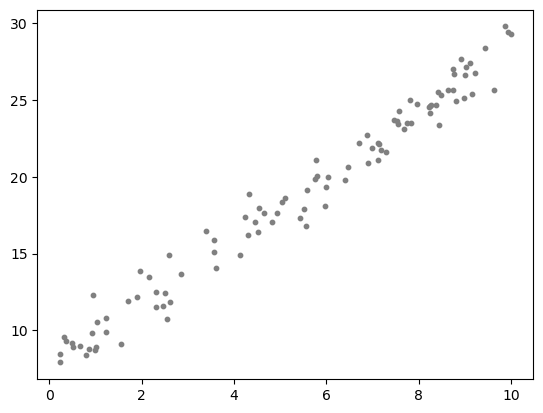

In [44]:
# Plots
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, s=10, c='grey')

## 1.2 Training and fitting a regression model

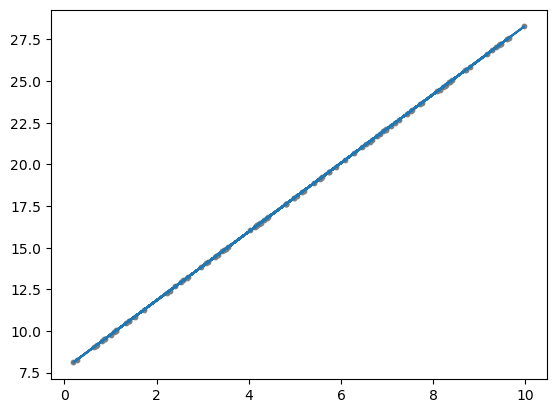

In [46]:
from sklearn.linear_model import LinearRegression

# Instantiate and train regressor `reg`
# <your code here>

reg = LinearRegression()
reg.fit(x_train.reshape(-1, 1), y_train) #dobbiamo trasformare il vettore in a
                                        #column vector
# Predict for 50 equally spaced values in [0, 10]
# Use the regressor to predict the y for x_test
# <your code here>
y_pred = reg.predict(x_test.reshape(-1, 1))

# Plots
fig, ax = plt.subplots()
ax.scatter(x_test, y_test, s=10, c='grey') # display points
ax.plot(x_test, y_pred) # display linear model

## 1.3 Evaluating regression

Use cross-validation with k=3 folds to evaluate a linear regressor.

Evaluate the results with R2 score, mean absolute error and mean squared error.

Use both `cross_val_score` and `cross_val_predict`

In [32]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

reg = LinearRegression()
# cross-validate `reg` using (x_train, y_train)
# and 3-fold cross-validation.
# Use the following metrics:
# r2, mae, mse (mae and mse should)

In [33]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [34]:
reg.fit(x_train, y_train)

LinearRegression()

In [36]:
print('r2:', r2_score(y_test, reg.predict(x_test)))
print('mse:', mean_squared_error(y_test, reg.predict(x_test)))
print('mae:', mean_absolute_error(y_test, reg.predict(x_test)))

r2: 0.9955334999946277
mse: 0.1591790768673117
mae: 0.3258589779319655


# 2. Linear regression with multiple input features

## 2.1 Generating a dataset

In [47]:
# Make dataset
X_train = 10*np.random.rand(1000, 2)    # 1000 data points, 2 features (x0, x1) in the range [0, 10]

noise = np.random.normal(0,2, 1000)     # 1000 points from gaussian, mean=0, std=2
y_train = (-2*X_train[:,0] + 3*X_train[:,1]  - 4) + noise

<IPython.core.display.Javascript object>


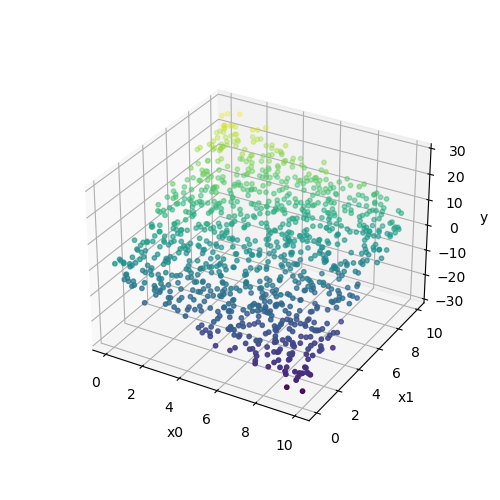

Text(0.5, 0, 'y')

In [50]:
#per renderlo interattivo
%matplotlib notebook

# Plots
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, s=10, c=y_train)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')

## 2.2 Training and fitting a regression model

<IPython.core.display.Javascript object>


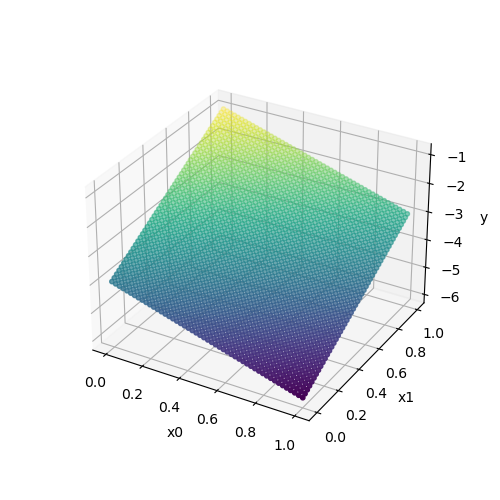

Text(0.5, 0, 'y')

In [51]:
# Train regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make a grid of 50 equally spaced values
values = np.linspace(0,1,50)
X_test = np.array([[x0, x1] for x0 in values for x1 in values])
# Predict values on the grid
y_test = reg.predict(X_test)

# Plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test, s=10, c=y_test)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')

## 2.3 Display the coefficients and the bias (intercept) terms learned by the regressor

In [52]:
#Questi sono i coeff
reg.coef_

array([-1.98425819,  2.97730288])

In [53]:
#Questo è l'intercept
reg.intercept_

-3.967191998433755